In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/needed_datasets/telco-customer-churn.csv',decimal=';')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [ ]:
data.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [ ]:
data.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1585,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,61,11,5174


In [ ]:
data.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [ ]:
data.isna().sum().any()

False

In [ ]:
data.duplicated().any()

False

In [ ]:
(data == " ").any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

## Treating missing values and converting data types

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Check for missing values in the column
data['TotalCharges'].isnull().sum()

11

In [ ]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype(float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop('customerID',axis=1,inplace=True)

## Data distrbution

In [ ]:
churn = data['Churn'].value_counts().to_frame()
churn.index.name = 'Churn'
churn.rename(columns={'Churn' :'counts'},inplace=True)
churn

,counts
Churn,
No,5163
Yes,1869


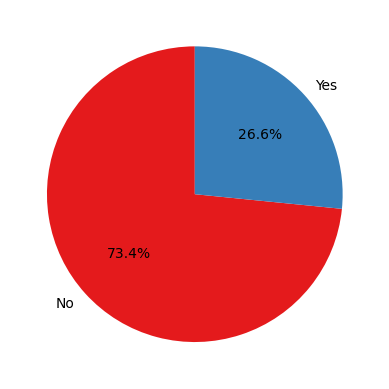

In [ ]:
plt.pie(labels=churn.index, x=churn['counts'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors);

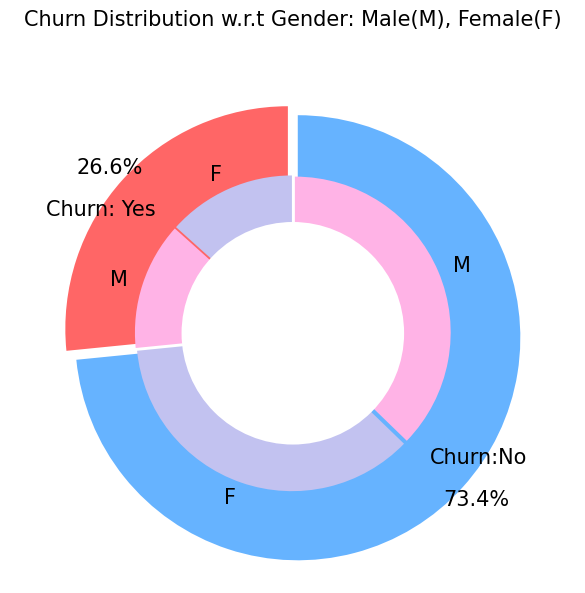

In [5]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

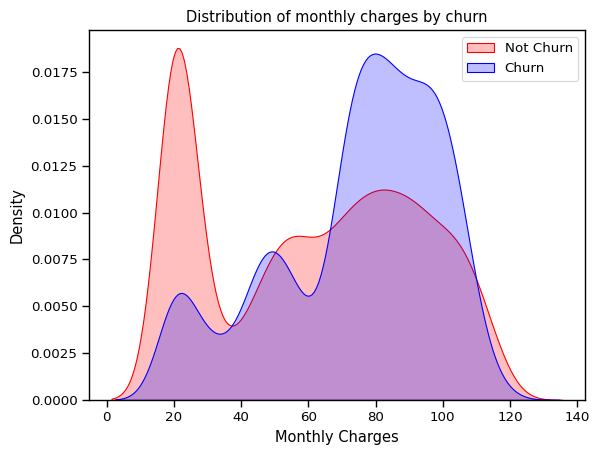

In [7]:
# Convert 'MonthlyCharges' column to numeric, handling potential errors
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')

# Rest of your code
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [ ]:
numeric_data = data[data.dtypes[(~(data.dtypes == object)) ].index].drop('SeniorCitizen', axis=1)
catigorical_data = data[data.dtypes[((data.dtypes == object)) ].index].join(data['SeniorCitizen'].astype(object)).drop('Churn', axis=1)

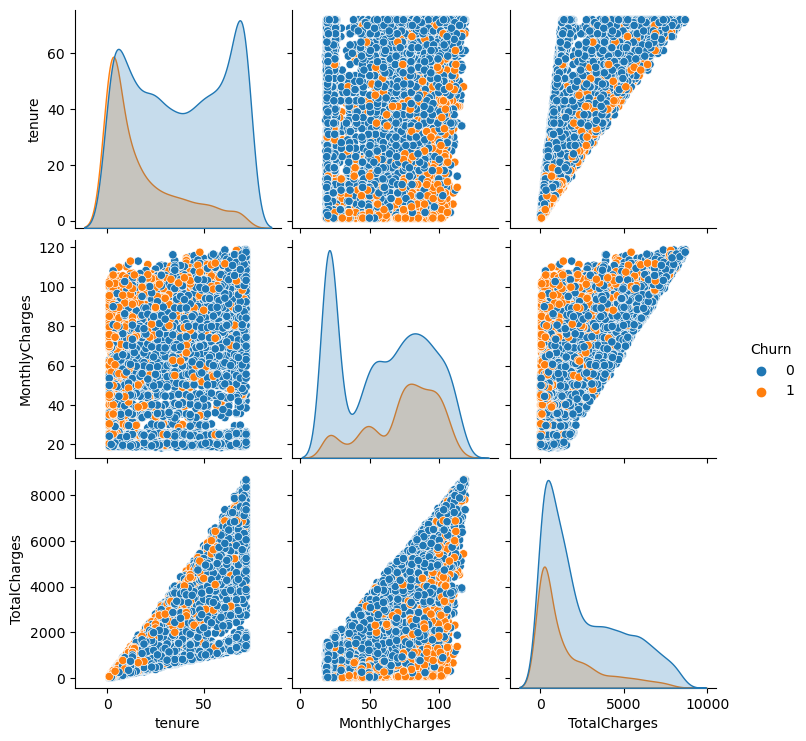

In [ ]:
numeric_data['Churn'] = data['Churn'].replace('Yes',1).replace('No',0)
sns.pairplot(data=numeric_data,hue='Churn')

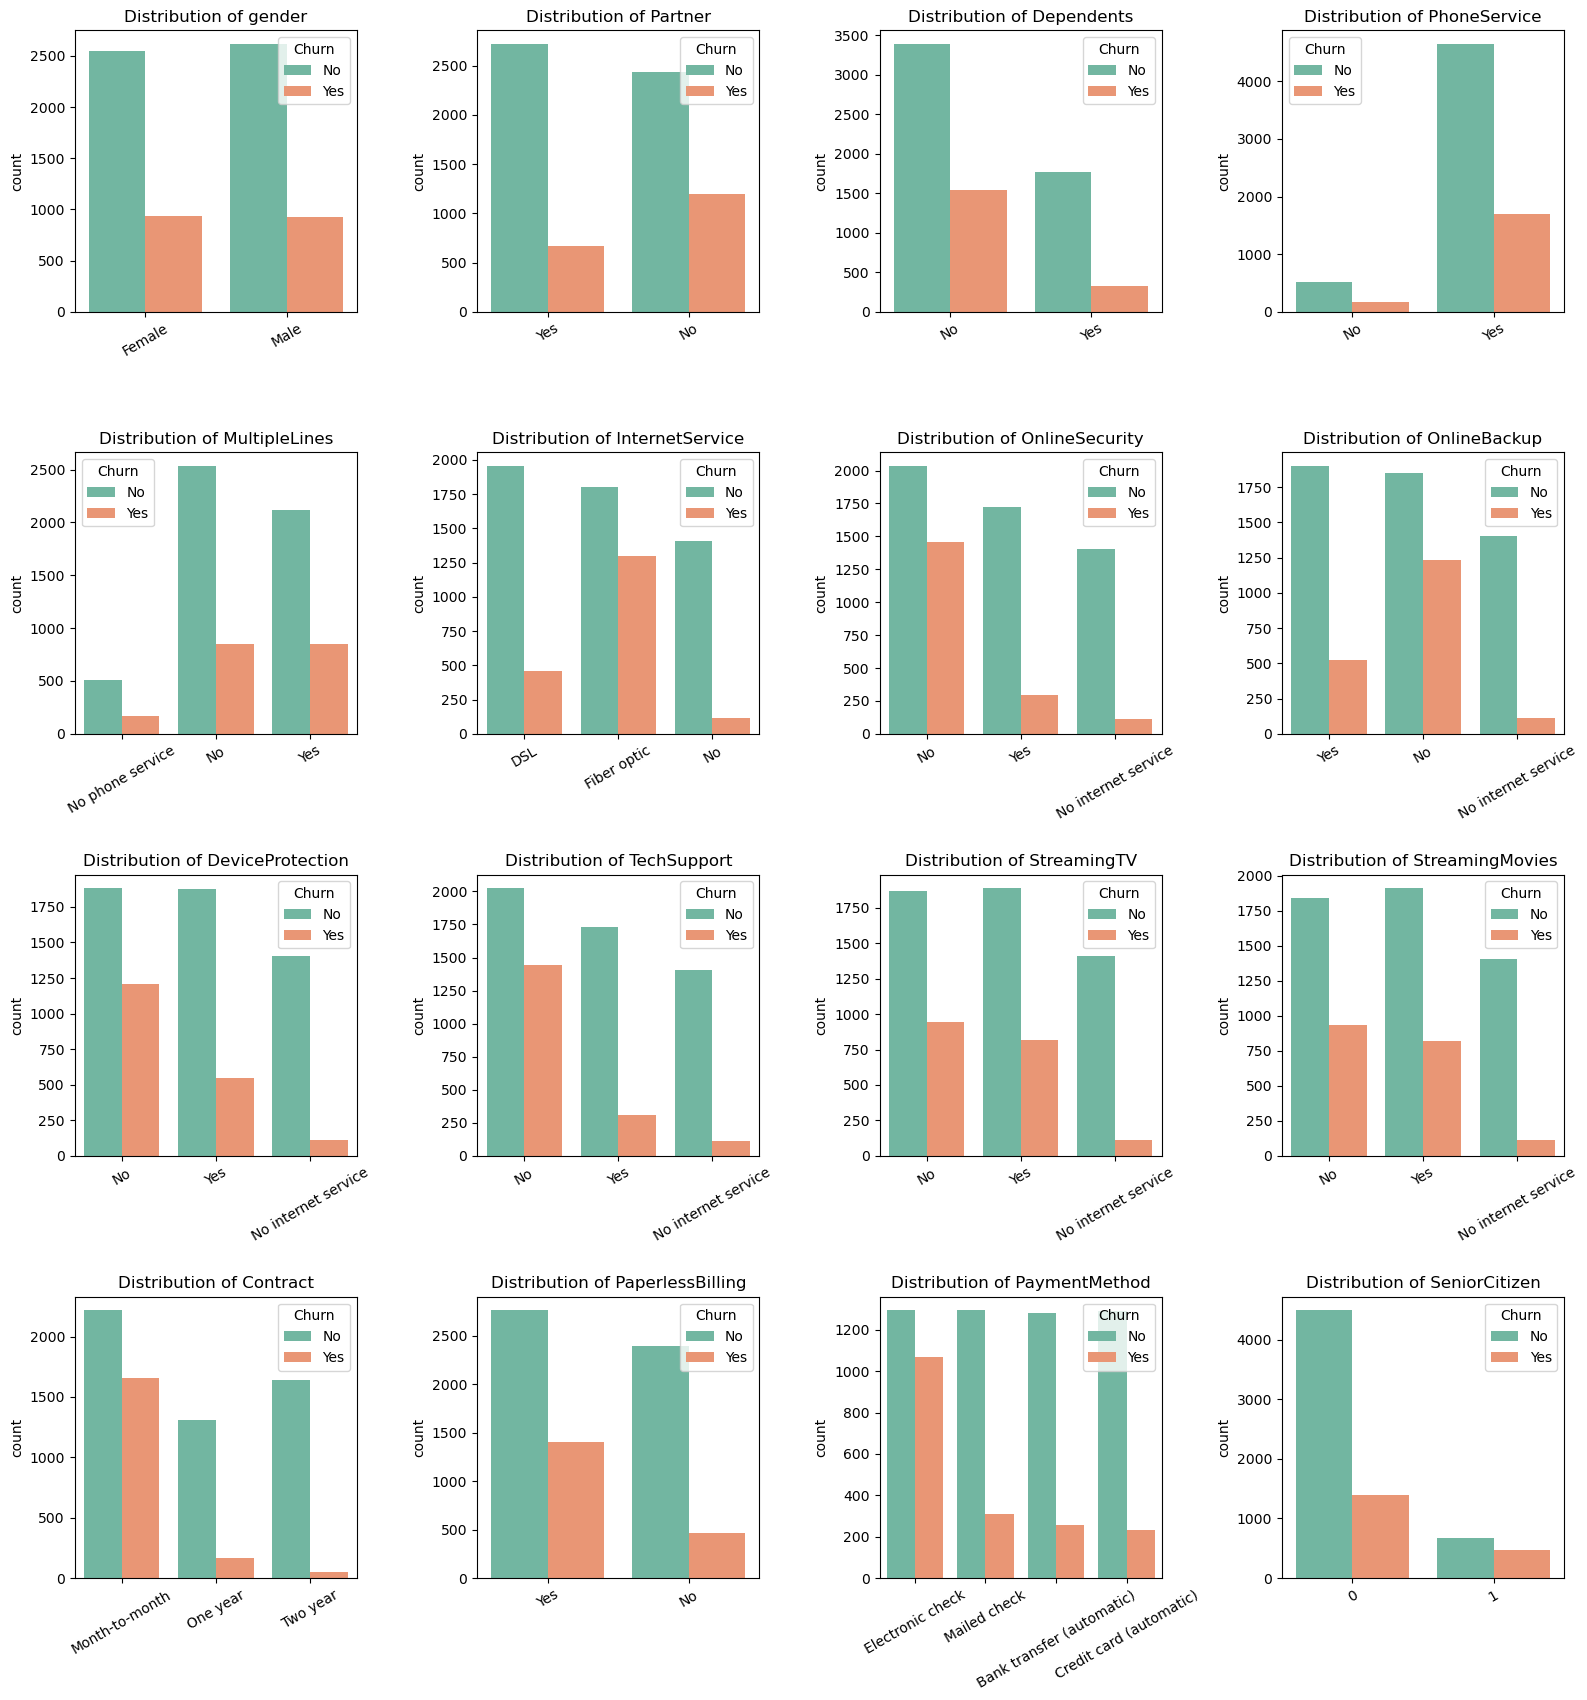

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 18))
axes = axes.flatten()
for i, column in enumerate(catigorical_data.columns):
    sns.countplot(x=column, data=data, palette="Set2", ax=axes[i],hue='Churn')
    axes[i].set_title(f'Distribution of {column}')

    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.5)
plt.show()

## Feature Engineering

#### Tenure Group

In [ ]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

data['TenureGroup'] = data['tenure'].apply(tenure_group)

#### Has Phone And Internet

In [ ]:
data['HasPhoneAndInternet'] = np.where((data['PhoneService'] == 'Yes') & (data['InternetService'] != 'No'), 1, 0)


#### Number of services

In [ ]:
data['NumServices'] = ((data[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies']] == 'Yes') |
                          (data['InternetService']=='DSL') |
                           (data['InternetService']== 'Fiber optic')).sum(axis=1)

#### TotalCharges per Tenure

In [ ]:
data['ChargesPerMonth'] = data['TotalCharges'] / data['tenure']

#### Contract and PaymentMethod

In [ ]:
data['Contract_PaymentInteraction'] = data['Contract'] + '_' + data['PaymentMethod']

In [ ]:
new_cols.dtypes

Contract_PaymentInteraction     object
ChargesPerMonth                float64
TenureGroup                     object
NumServices                      int64
Churn                            int64
dtype: object

## New columns distrbution

In [ ]:
new_cols = data[['Contract_PaymentInteraction','ChargesPerMonth','TenureGroup','NumServices','HasPhoneAndInternet','Churn']]

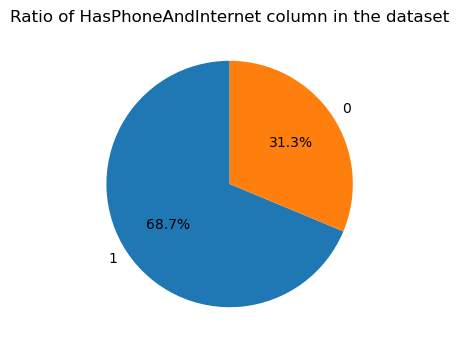

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(labels=new_cols['HasPhoneAndInternet'].value_counts().index, x=new_cols['HasPhoneAndInternet'].value_counts().values
       , autopct='%1.1f%%', startangle=90)
plt.title(f'Ratio of HasPhoneAndInternet column in the dataset')

plt.show()

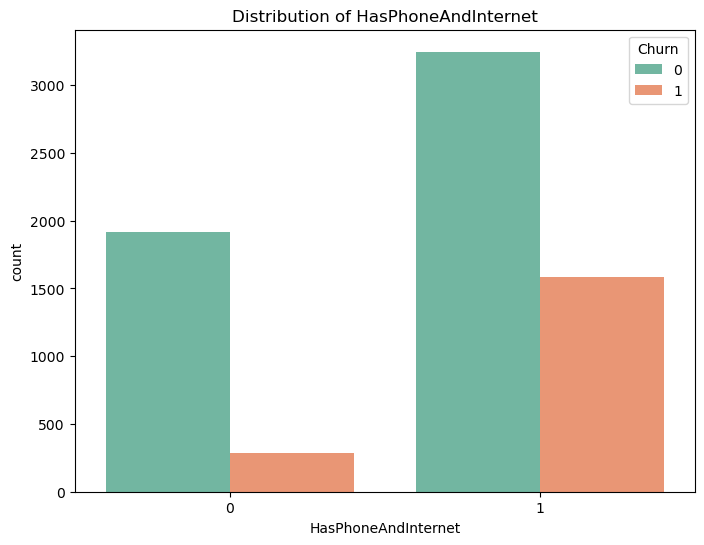

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='HasPhoneAndInternet', data=new_cols, palette="Set2",hue='Churn')
plt.title(f'Distribution of HasPhoneAndInternet')

plt.show()

Insights on Churn for Customers with Both Phone and Internet Services:

- The majority of customers have both phone and internet services.
- Customers without both services have a lower churn rate.
- Among those with both services, churn is higher, though most still remain loyal.

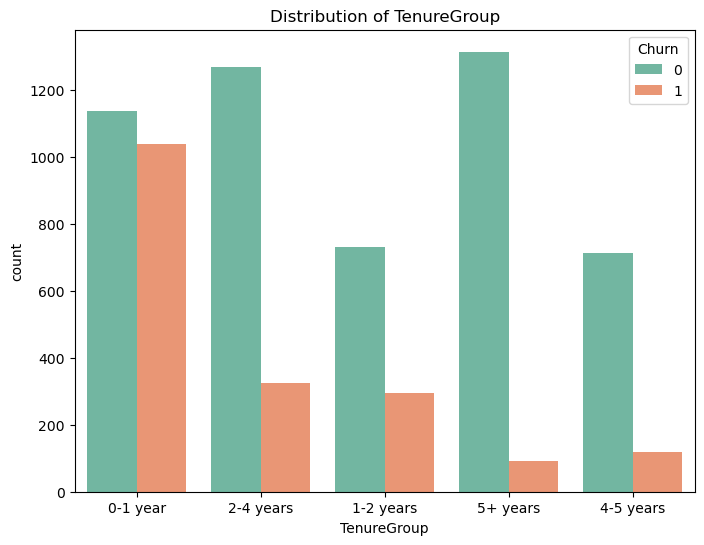

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='TenureGroup', data=new_cols, palette="Set2",hue='Churn')
plt.title(f'Distribution of TenureGroup')

plt.show()

Insights on Churn Based on Tenure:

- Customers in the 0-1 year group show a much higher churn rate compared to other tenure groups.
- As tenure increases, churn significantly decreases, with the 5+ years group having the lowest churn rate.

## Checking Correlations

In [ ]:
corr_df  = data
corr_df['Churn'] = numeric_data['Churn']

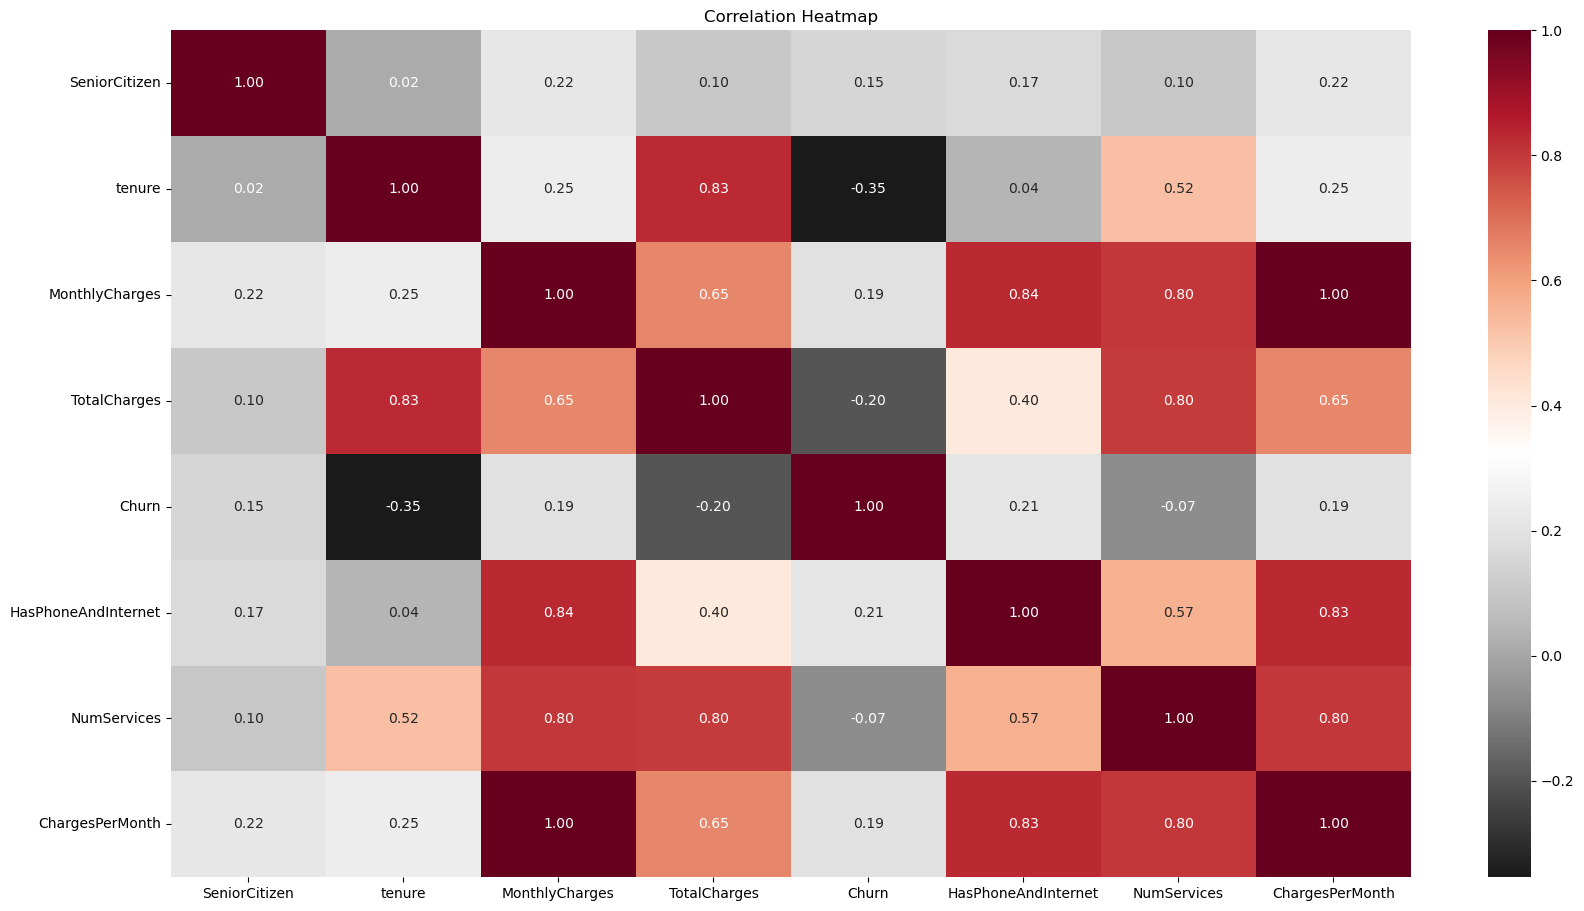

In [ ]:
plt.figure(figsize=(20,11))
sns.heatmap(data.corr(), annot=True, cmap='RdGy_r', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=0)
plt.show()

In [ ]:
corr_df.corr()['Churn'].to_frame().sort_values(by='Churn')

,Churn
tenure,-0.354049
TotalCharges,-0.199484
NumServices,-0.067459
SeniorCitizen,0.150541
ChargesPerMonth,0.192033
MonthlyCharges,0.192858
HasPhoneAndInternet,0.209490
Churn,1.000000



- Tenure (-0.35): Longer-term customers are less likely to churn.
- TotalCharges (-0.20): Higher total spend lowers churn risk.
- HasPhoneAndInternet (0.21) and MonthlyCharges (0.19): Higher churn risk for customers with bundled services or higher bills.
- SeniorCitizen (0.15): Slightly higher churn among senior citizens.

# Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
data_encoded =data.copy()
for column in catigorical_data.drop(['SeniorCitizen'],axis=1).columns:
    if data_encoded[column].nunique() == 2 :
        data_encoded[column] = encoder.fit_transform(data_encoded[column])
    else:
        dummies = pd.get_dummies(data_encoded[column], prefix=column, drop_first=True)
        data_encoded = pd.concat([data_encoded, dummies], axis=1)
        data_encoded.drop(column, axis=1, inplace=True)
data_encoded['TenureGroup'] = encoder.fit_transform(data_encoded['TenureGroup'])
data_encoded['Contract_PaymentInteraction'] = encoder.fit_transform(data_encoded['Contract_PaymentInteraction'])

In [ ]:
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = data_encoded.drop('Churn',axis=1)
y = data_encoded['Churn'].replace('Yes',1).replace('No',0)

## Handling Inbalance dataset

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

In [ ]:
X = df_smote.drop(['Churn'], axis=1)
y = df_smote['Churn']

# Data Scaling and Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.1)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Churn Prediction Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold ,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from numpy import std , mean

In [ ]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=150)]

In [ ]:
for model in models:
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, x_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'Accuracy for {model} : %.3f (%.3f)' % (mean(scores)*100,std(scores)*100))

Accuracy for LogisticRegression() : 85.356 (1.117)
Accuracy for DecisionTreeClassifier() : 81.202 (1.220)
Accuracy for RandomForestClassifier() : 86.308 (1.391)


In [ ]:
y_forest_pred = cross_val_predict(RandomForestClassifier(), x_train_scaled, y_train, cv=10)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_forest_pred)

0.8618146735579567

## Performance Comparison

In [ ]:
for model in models:
    y_pred = cross_val_predict(model, x_train_scaled, y_train, cv=10)
    print(f"===============================================================")
    print(f"{model} Accuracy : %.3f " % (roc_auc_score(y_train, y_pred)*100))
    print(f"===============================================================")
    print(classification_report(y_train, y_pred))
    print(f"                                                               ")
    print(f"                                                               ")



LogisticRegression() Accuracy : 85.305 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4651
           1       0.85      0.84      0.85      4281

    accuracy                           0.85      8932
   macro avg       0.85      0.85      0.85      8932
weighted avg       0.85      0.85      0.85      8932

                                                               
                                                               
DecisionTreeClassifier() Accuracy : 81.076 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4651
           1       0.80      0.81      0.80      4281

    accuracy                           0.81      8932
   macro avg       0.81      0.81      0.81      8932
weighted avg       0.81      0.81      0.81      8932

                                                               
                                                               
Random